In [1]:
# Author: Yuki Rivera
# This notebook creates various graphs for model comparisons

### Imports libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

### Loads the dataframe

In [3]:
df = pd.read_csv('Comparison_1.csv')
df = df.rename(columns={'Unnamed: 0': 'Model'})

In [4]:
df.head()

,Model,PPL,CS,MI_Score
0,RNN,225.52,0.238,5.5
1,LSTM,266.66,0.164,3.0
2,RNN-GRU,275.24,0.169,3.5
3,LSTM-GRU,249.89,0.203,1.5
4,Transformer,41.86,0.212,24.5


### Function to create individual plots for perplexity, cosine similarity and manual scores

In [ ]:
def plot_metric(df, column, cmap='Blues', higher_is_better=False):

    values = df[column]
    models = df['Model']
    best_idx = values.idxmax() if higher_is_better else values.idxmin()

    # sets font sizes
    plt.rcParams.update({
        'font.size': 20,
        'axes.titlesize': 24,
        'axes.labelsize': 20,
        'xtick.labelsize': 20,
        'ytick.labelsize': 18,
    })

    # generates N evenly spaced shades from the colormap
    norm = np.linspace(0.4, 0.9, len(models))  
    colors = [cm.get_cmap(cmap)(n) for n in norm]
    
    _, ax = plt.subplots(figsize=(10, 5))
    bars = ax.bar(models, values, color=colors)

    # Calculate fixed buffer above tallest bar
    max_val = values.max()
    buffer = 0.09 * max_val
    ax.set_ylim(0, max_val + buffer*2)

    for i, (bar, val) in enumerate(zip(bars, values)):
        if i == best_idx:
            label = r"$\mathbf{" + f"{val:.2f} ★ Best" + "}$"
        else:
            label = f"{val:.2f}"  
              
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height() + buffer * 0.3,
                label, ha='center', va='bottom', fontsize=18)
    
    # prepares different labels for each case
    labels = {'CS':'Cosine Similarity', 'PPL':'Perplexity', 'MI_Score':'Manual Inspection Score'}

    value_name = labels[column]
    rotation = 15 if len(models) > 3 else 0
    ax.set_xticklabels(models, rotation=rotation)

    plt.title(f"{value_name} Across Models")
    plt.xticks(rotation=rotation, ha='center')
    plt.ylabel(value_name)
    plt.tight_layout()
    plt.show()



### Function to create a plot showing perplexity, cosine similarity and manual scores all at once

In [ ]:
def plot_scaled_metrics(df, title, filename):
    # Normalize metrics to [0, 1]
    df['PPL_scaled'] = df['PPL'] / df['PPL'].max()
    df['CS_scaled'] = df['CS'] / df['CS'].max()
    df['MI_scaled'] = df['MI_Score'] / df['MI_Score'].max()

    # Sets font sizes
    plt.rcParams.update({
        'font.size': 20,
        'axes.titlesize': 20,
        'axes.labelsize': 20,
        'xtick.labelsize': 20,
        'ytick.labelsize': 18,
        'legend.fontsize': 20,
    })

    # Plot each line with different color and markers
    plt.figure(figsize=(12, 7))
    plt.plot(df['Model'], df['PPL_scaled'], marker='^', linestyle=':', color='blue', label='Perplexity')
    plt.plot(df['Model'], df['CS_scaled'], marker='o', linestyle='-', color='red', label='Cosine Similarity')
    plt.plot(df['Model'], df['MI_scaled'], marker='s', linestyle='--', color='green', label='Manual Inspection')

    plt.title(title)
    plt.ylabel('Scaled Score [0–1]')
    plt.xticks(rotation=0, ha='center')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), frameon=True, ncol=3)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25)
    plt.savefig(filename, dpi=300)
    plt.show()
    plt.close()  # Ensure clean separation between plots

C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = [cm.get_cmap(cmap)(n) for n in norm]
C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=rotation)


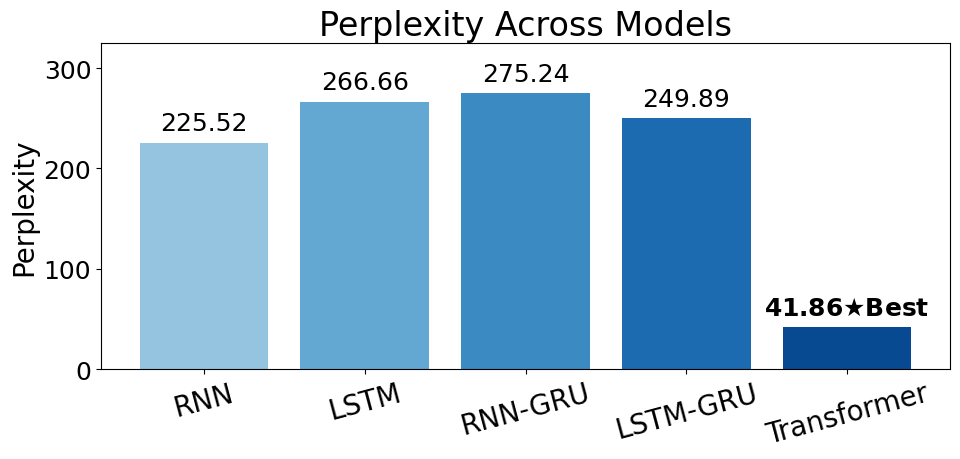

C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = [cm.get_cmap(cmap)(n) for n in norm]
C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=rotation)


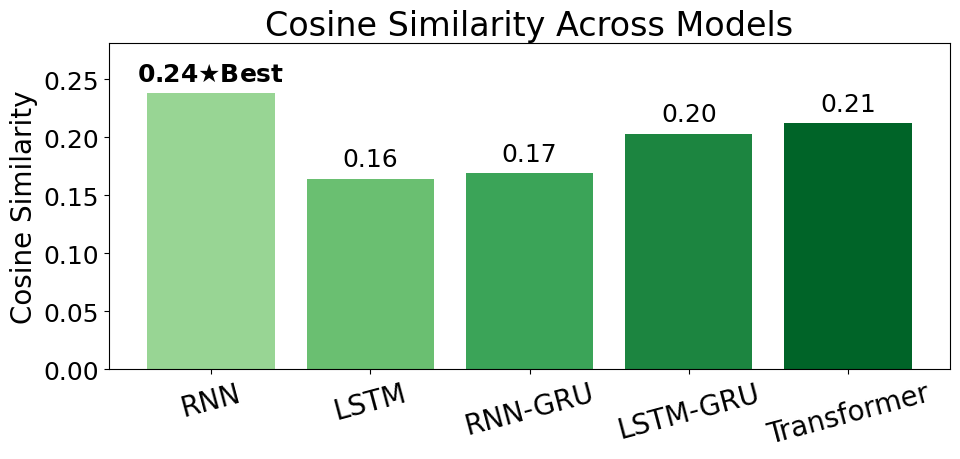

C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = [cm.get_cmap(cmap)(n) for n in norm]
C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=rotation)


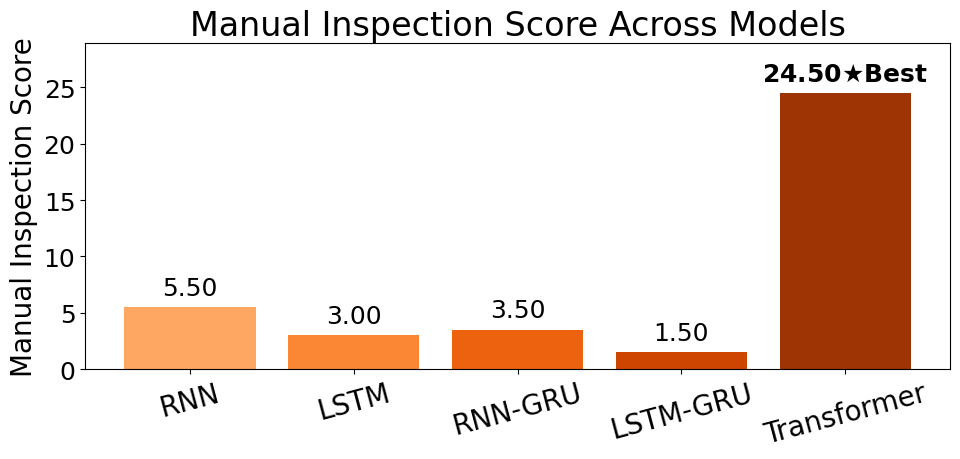

In [7]:
plot_metric(df, "PPL", cmap='Blues', higher_is_better=False)
plot_metric(df, "CS", cmap='Greens', higher_is_better=True)
plot_metric(df, "MI_Score", cmap='Oranges', higher_is_better=True)


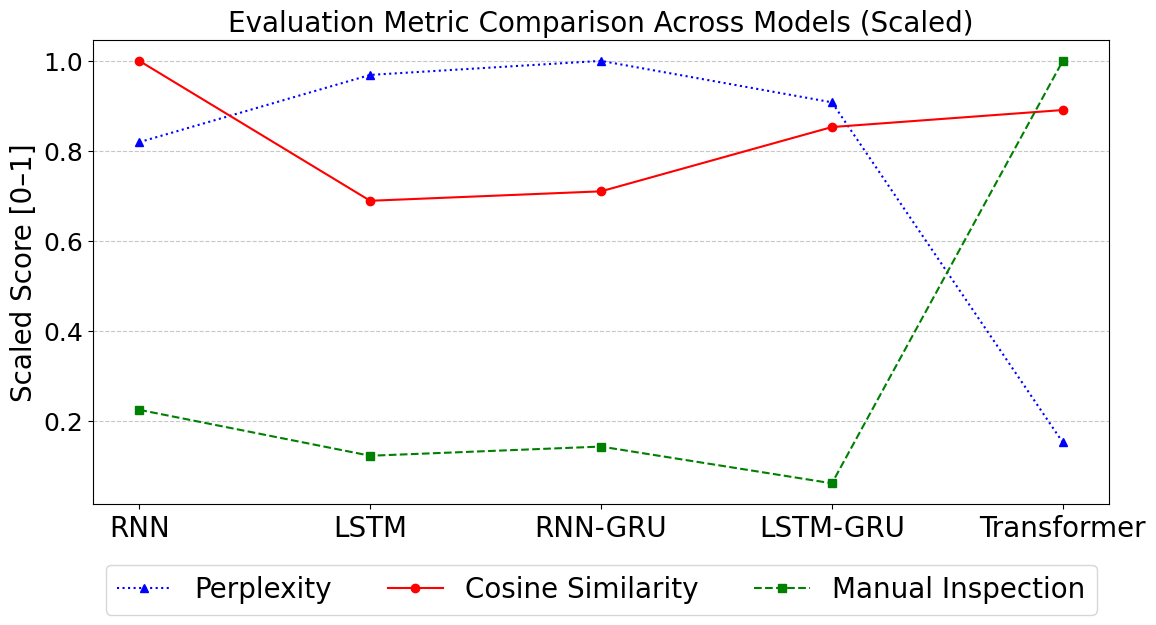

In [19]:
plot_scaled_metrics(df, "Evaluation Metric Comparison Across Models (Scaled)", "plot1.png")

In [8]:
df2=pd.read_csv('Comparison_2.csv')

In [9]:
df2.head()

,Model,PPL,CS,MI_Score
0,BART,43.24,0.256,42
1,T5,43.94,0.212,10
2,GPT2,58.82,0.239,43


C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = [cm.get_cmap(cmap)(n) for n in norm]
C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=rotation)


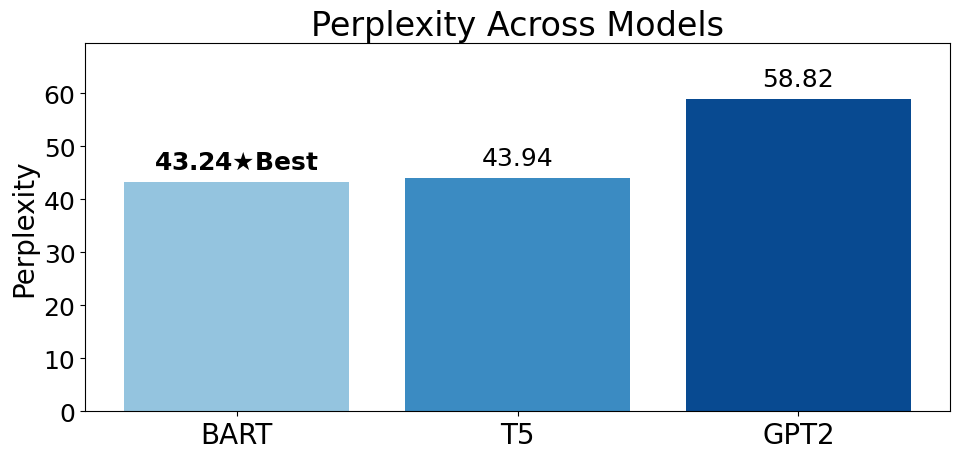

C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = [cm.get_cmap(cmap)(n) for n in norm]
C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=rotation)


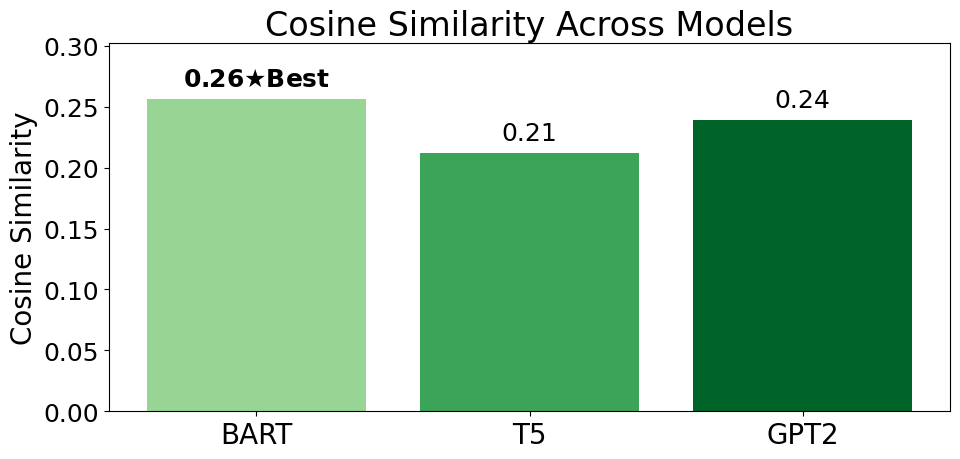

C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = [cm.get_cmap(cmap)(n) for n in norm]
C:\Users\Yuki\AppData\Local\Temp\ipykernel_25144\1505993250.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=rotation)


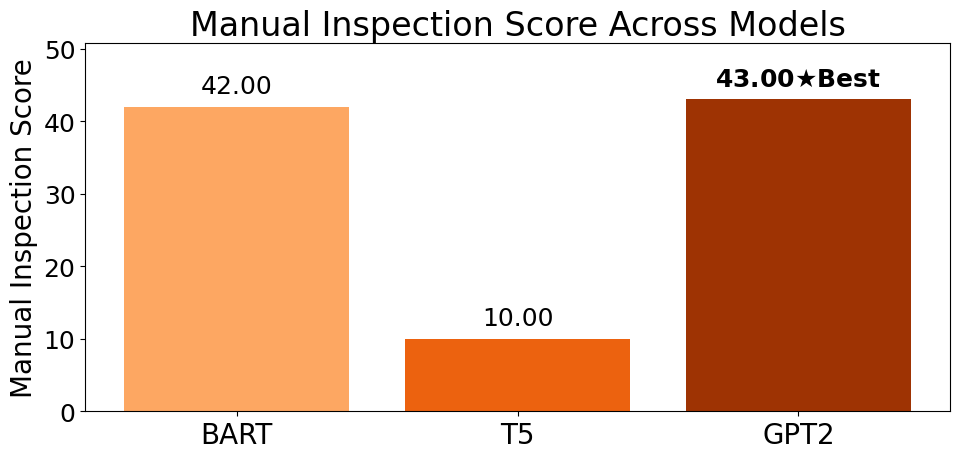

In [10]:
plot_metric(df2, "PPL", cmap='Blues', higher_is_better=False)
plot_metric(df2, "CS", cmap='Greens', higher_is_better=True)
plot_metric(df2, "MI_Score", cmap='Oranges', higher_is_better=True)

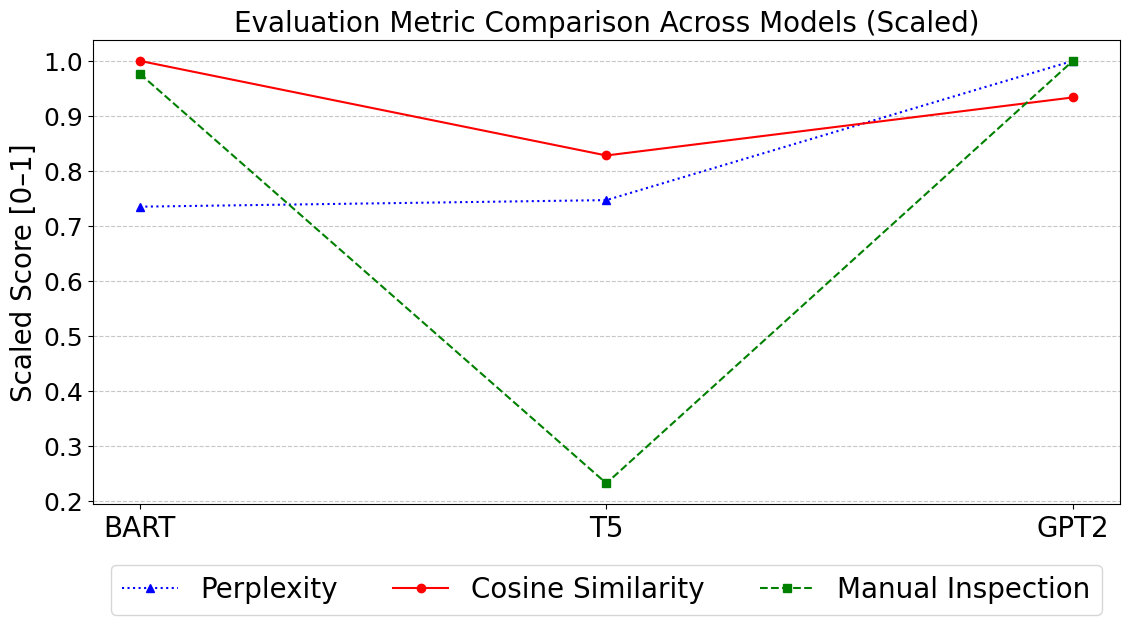

In [13]:
plot_scaled_metrics(df2, "Evaluation Metric Comparison Across Models (Scaled)", "plot2.png")